# Introduction
State notebook purpose here

### Imports
Import libraries and write settings here.

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Remove Warnings
import warnings
warnings.filterwarnings("ignore")

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Imports For This Notebook
from scipy.stats import kurtosis, skew,boxcox,boxcox_normmax 
import scipy.stats as stats
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
# Imports for this Notebook
from sklearn.decomposition import PCA
from matplotlib.colors import cnames
from itertools import cycle
from bokeh.plotting import output_notebook, output_file, figure, show, ColumnDataSource
from bokeh.models import HoverTool
import warnings
warnings.filterwarnings(action='ignore')
output_notebook()
%matplotlib inline

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

Loading BokehJS ...

# Analysis/Modeling
Do work here

<b>
    Loading and Understanding the Data 

In [3]:
df=pd.read_csv("Modeling-Assignment Dataset.csv")

In [4]:
df.head()

,RowNumber,LeadId,Surname,months_since_lead_gen,lead_gen_channel,Gender,Age,City,airline_loyalty_tier,no_of_family_members,is_6M_enquiry,is_3M_active,Converted_y_N
0,1,15634602,Hargrave,4,Networks,Female,42,Bangalore,None,1,1,1,1
1,2,15647311,Hill,4,Organic,Female,41,Hyderabad,None,1,1,0,0
2,3,15619304,Onio,3,Networks,Female,42,Mumbai,Platinum,3,0,1,1
3,4,15701354,Boni,4,Networks,Female,39,Hyderabad,None,2,0,0,0
4,5,15737888,Mitchell,6,Organic,Female,43,Bangalore,Base,1,1,1,0


In [5]:
df.shape

(10000, 13)

In [6]:
df.describe()

,RowNumber,LeadId,months_since_lead_gen,Age,no_of_family_members,is_6M_enquiry,is_3M_active,Converted_y_N
count,10000.00000,1.000000e+04,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,5000.50000,1.569094e+07,4.00330,38.921800,1.530200,0.515100,0.70550,0.203700
std,2886.89568,7.193619e+04,1.00707,10.487806,0.581654,0.499797,0.45584,0.402769
min,1.00000,1.556570e+07,1.00000,18.000000,1.000000,0.000000,0.00000,0.000000
25%,2500.75000,1.562853e+07,3.00000,32.000000,1.000000,0.000000,0.00000,0.000000
50%,5000.50000,1.569074e+07,4.00000,37.000000,1.000000,1.000000,1.00000,0.000000
75%,7500.25000,1.575323e+07,5.00000,44.000000,2.000000,1.000000,1.00000,0.000000
max,10000.00000,1.581569e+07,6.00000,92.000000,4.000000,1.000000,1.00000,1.000000


<b>
    Missing value treatment

In [7]:
df.isnull().sum()

RowNumber                0
LeadId                   0
Surname                  0
months_since_lead_gen    0
lead_gen_channel         0
Gender                   0
Age                      0
City                     0
airline_loyalty_tier     0
no_of_family_members     0
is_6M_enquiry            0
is_3M_active             0
Converted_y_N            0
dtype: int64

In [8]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [9]:
missing_values_table(df)

Your selected dataframe has 13 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


There's no missing values in this dataset.

<b>
    Changing data type from int64 to object

In [10]:
df.LeadId = df.LeadId.astype(str)
df.months_since_lead_gen = df.months_since_lead_gen.astype(str)
df.no_of_family_members = df.no_of_family_members.astype(str)
df.is_6M_enquiry = df.is_6M_enquiry.astype(str)
df.is_3M_active = df.is_3M_active.astype(str)
#df.booked_y_n = df.booked_y_n.astype(str)
print(df.dtypes)

RowNumber                 int64
LeadId                   object
Surname                  object
months_since_lead_gen    object
lead_gen_channel         object
Gender                   object
Age                       int64
City                     object
airline_loyalty_tier     object
no_of_family_members     object
is_6M_enquiry            object
is_3M_active             object
Converted_y_N             int64
dtype: object


<b>
    Redundancy Check

In [11]:
df.duplicated('LeadId').sum()

0

<b>
    Imbalance Check

In [12]:
df.Converted_y_N.value_counts()

0    7963
1    2037
Name: Converted_y_N, dtype: int64

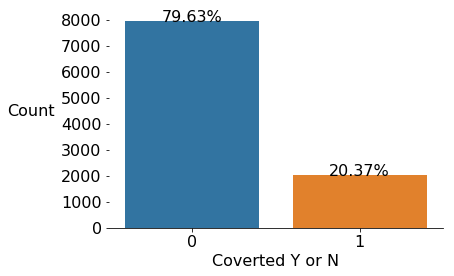

In [13]:
plt.figure(figsize=(6,4))
fig = sns.countplot(df.Converted_y_N)
sns.despine(left=True)
fig.set_xlabel('Coverted Y or N', fontsize=16)
plt.xticks(fontsize=16)
fig.set_ylabel('Count', fontsize=16, rotation=0)
fig.yaxis.labelpad = 30
plt.yticks(fontsize=16)
#Annot
for p in fig.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    fig.annotate('{:}%'.format(p.get_height()*100/len(df)), (x.mean(), y-150), ha='center', va='bottom', fontsize=16, color='black')
plt.show()

The dataset is highly imbalanced. We can use sampling methods to address the same.

<b>
   Exploratory Data Analysis

<b>
    MONTH IN WHICH LEAD IS GENERATED

In [14]:
# Month Since Lead Generate w.r.t Converted

"""Plot the target variable to make it easier to visualise. """
plt.figure(figsize=(16,8))
fig = sns.countplot(df.months_since_lead_gen,hue=df.Converted_y_N)
sns.despine(left=True)
fig.set_xlabel('Month Since Lead Generated', fontsize=16)
plt.xticks(fontsize=16)
fig.set_ylabel('Count', fontsize=16, rotation=0)
fig.yaxis.labelpad = 30
plt.yticks(fontsize=16)
#Annot
for p in fig.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    fig.annotate('{:}'.format((p.get_height())), (x.mean(), y-1), ha='center', va='bottom', fontsize=16, color='black')
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


ValueError: cannot convert float NaN to integer

<Figure size 1152x576 with 1 Axes>

In [15]:
df_Lead_Month = df.pivot_table(values='RowNumber',index='months_since_lead_gen',
                                           columns='Converted_y_N',aggfunc=len)
df_Lead_Month['Total']=df_Lead_Month[0]+df_Lead_Month[1]
df_Lead_Month['% Converted'] = (df_Lead_Month[1]/df_Lead_Month['Total'])*100
df_Lead_Month['% Not Converted'] = (df_Lead_Month[0]/df_Lead_Month['Total'])*100
df_Lead_Month

Converted_y_N,0,1,Total,% Converted,% Not Converted
months_since_lead_gen,,,,,
1,NaN,19.0,NaN,NaN,NaN
2,491.0,133.0,624.0,21.314103,78.685897
3,1910.0,513.0,2423.0,21.172101,78.827899
4,3065.0,753.0,3818.0,19.722368,80.277632
5,1979.0,492.0,2471.0,19.910967,80.089033
6,518.0,127.0,645.0,19.689922,80.310078


<b>
    LEAD GENERATED CHANNEL

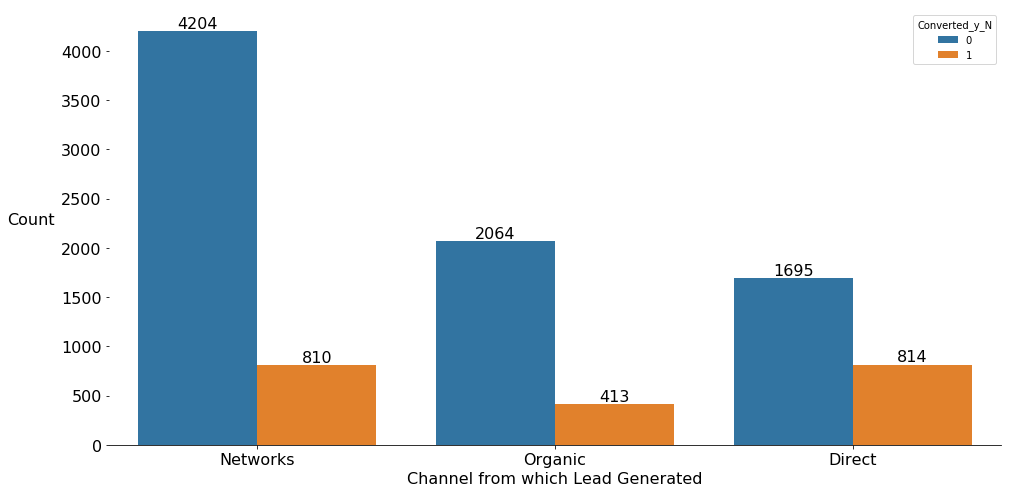

In [16]:
# Month Since Lead Generate w.r.t Converted

"""Plot the target variable to make it easier to visualise. """
plt.figure(figsize=(16,8))
fig = sns.countplot(df.lead_gen_channel,hue=df.Converted_y_N)
sns.despine(left=True)
fig.set_xlabel('Channel from which Lead Generated', fontsize=16)
plt.xticks(fontsize=16)
fig.set_ylabel('Count', fontsize=16, rotation=0)
fig.yaxis.labelpad = 30
plt.yticks(fontsize=16)
#Annot
for p in fig.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    fig.annotate('{:}'.format((p.get_height())), (x.mean(), y-1), ha='center', va='bottom', fontsize=16, color='black')
plt.show()

In [17]:
df_Lead_Channel = df.pivot_table(values='RowNumber',index='lead_gen_channel',
                                           columns='Converted_y_N',aggfunc=len)
df_Lead_Channel['Total']=df_Lead_Channel[0]+df_Lead_Channel[1]
df_Lead_Channel['% Converted'] = (df_Lead_Channel[1]/df_Lead_Channel['Total'])*100
df_Lead_Channel['% Not Converted'] = (df_Lead_Channel[0]/df_Lead_Channel['Total'])*100
df_Lead_Channel

Converted_y_N,0,1,Total,% Converted,% Not Converted
lead_gen_channel,,,,,
Direct,1695,814,2509,32.443204,67.556796
Networks,4204,810,5014,16.154767,83.845233
Organic,2064,413,2477,16.673395,83.326605


<b>
    GENDER

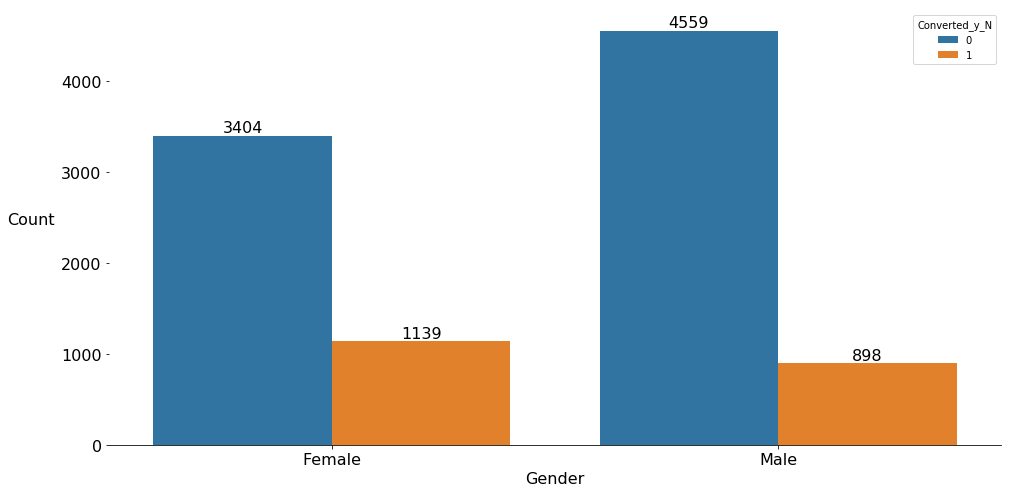

In [18]:
# Gender Counts w.r.t Converted

"""Plot the target variable to make it easier to visualise. """
plt.figure(figsize=(16,8))
fig = sns.countplot(df.Gender,hue=df.Converted_y_N)
sns.despine(left=True)
fig.set_xlabel('Gender', fontsize=16)
plt.xticks(fontsize=16)
fig.set_ylabel('Count', fontsize=16, rotation=0)
fig.yaxis.labelpad = 30
plt.yticks(fontsize=16)
#Annot
for p in fig.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    fig.annotate('{:}'.format((p.get_height())), (x.mean(), y-1), ha='center', va='bottom', fontsize=16, color='black')
plt.show()

In [19]:
df_Gender = df.pivot_table(values='RowNumber',index='Gender',
                                           columns='Converted_y_N',aggfunc=len)
df_Gender['Total']=df_Gender[0]+df_Gender[1]
df_Gender['% Converted'] = (df_Gender[1]/df_Gender['Total'])*100
df_Gender['% Not Converted'] = (df_Gender[0]/df_Gender['Total'])*100
df_Gender

Converted_y_N,0,1,Total,% Converted,% Not Converted
Gender,,,,,
Female,3404,1139,4543,25.071539,74.928461
Male,4559,898,5457,16.455928,83.544072


<b>
    CITY

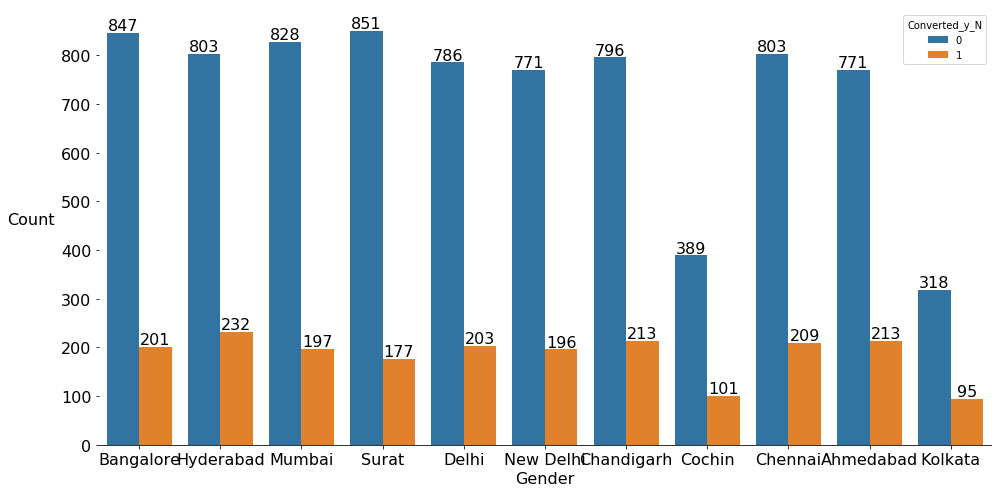

In [20]:
# City Counts w.r.t Converted

"""Plot the target variable to make it easier to visualise. """
plt.figure(figsize=(16,8))
fig = sns.countplot(df.City,hue=df.Converted_y_N)
sns.despine(left=True)
fig.set_xlabel('Gender', fontsize=16)
plt.xticks(fontsize=16)
fig.set_ylabel('Count', fontsize=16, rotation=0)
fig.yaxis.labelpad = 30
plt.yticks(fontsize=16)
#Annot
for p in fig.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    fig.annotate('{:}'.format((p.get_height())), (x.mean(), y-1), ha='center', va='bottom', fontsize=16, color='black')
plt.show()

In [21]:
df_City = df.pivot_table(values='RowNumber',index='City',
                                           columns='Converted_y_N',aggfunc=len)
df_City['Total']=df_City[0]+df_City[1]
df_City['% Converted'] = (df_City[1]/df_City['Total'])*100
df_City['% Not Converted'] = (df_City[0]/df_City['Total'])*100
df_City

Converted_y_N,0,1,Total,% Converted,% Not Converted
City,,,,,
Ahmedabad,771,213,984,21.646341,78.353659
Bangalore,847,201,1048,19.179389,80.820611
Chandigarh,796,213,1009,21.110010,78.889990
Chennai,803,209,1012,20.652174,79.347826
Cochin,389,101,490,20.612245,79.387755
Delhi,786,203,989,20.525784,79.474216
Hyderabad,803,232,1035,22.415459,77.584541
Kolkata,318,95,413,23.002421,76.997579
Mumbai,828,197,1025,19.219512,80.780488


<b>
    AIRLINE LOYALTY TIER

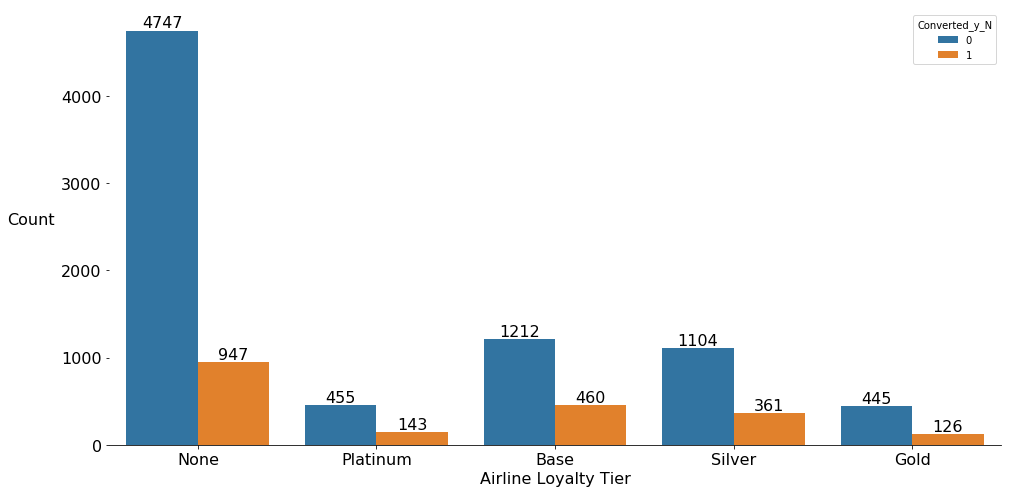

In [22]:
# City Counts w.r.t Converted

"""Plot the target variable to make it easier to visualise. """
plt.figure(figsize=(16,8))
fig = sns.countplot(df.airline_loyalty_tier,hue=df.Converted_y_N)
sns.despine(left=True)
fig.set_xlabel('Airline Loyalty Tier', fontsize=16)
plt.xticks(fontsize=16)
fig.set_ylabel('Count', fontsize=16, rotation=0)
fig.yaxis.labelpad = 30
plt.yticks(fontsize=16)
#Annot
for p in fig.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    fig.annotate('{:}'.format((p.get_height())), (x.mean(), y-1), ha='center', va='bottom', fontsize=16, color='black')
plt.show()

In [23]:
df_Airline = df.pivot_table(values='RowNumber',index='airline_loyalty_tier',
                                           columns='Converted_y_N',aggfunc=len)
df_Airline['Total']=df_Airline[0]+df_Airline[1]
df_Airline['% Converted'] = (df_Airline[1]/df_Airline['Total'])*100
df_Airline['% Not Converted'] = (df_Airline[0]/df_Airline['Total'])*100
df_Airline

Converted_y_N,0,1,Total,% Converted,% Not Converted
airline_loyalty_tier,,,,,
Base,1212,460,1672,27.511962,72.488038
Gold,445,126,571,22.066550,77.933450
None,4747,947,5694,16.631542,83.368458
Platinum,455,143,598,23.913043,76.086957
Silver,1104,361,1465,24.641638,75.358362


<b>
    NUMBER OF FAMILY MEMBERS

In [24]:
# Number of Family Members Counts w.r.t Converted

"""Plot the target variable to make it easier to visualise. """
plt.figure(figsize=(16,8))
fig = sns.countplot(df.no_of_family_members,hue=df.Converted_y_N)
sns.despine(left=True)
fig.set_xlabel('Number of Family Members', fontsize=16)
plt.xticks(fontsize=16)
fig.set_ylabel('Count', fontsize=16, rotation=0)
fig.yaxis.labelpad = 30
plt.yticks(fontsize=16)
#Annot
for p in fig.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    fig.annotate('{:}'.format((p.get_height())), (x.mean(), y-1), ha='center', va='bottom', fontsize=16, color='black')
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


ValueError: cannot convert float NaN to integer

<Figure size 1152x576 with 1 Axes>

In [25]:
df_Members = df.pivot_table(values='RowNumber',index='airline_loyalty_tier',
                                           columns='Converted_y_N',aggfunc=len)
df_Members['Total']=df_Members[0]+df_Members[1]
df_Members['% Converted'] = (df_Members[1]/df_Members['Total'])*100
df_Members['% Not Converted'] = (df_Members[0]/df_Members['Total'])*100
df_Members

Converted_y_N,0,1,Total,% Converted,% Not Converted
airline_loyalty_tier,,,,,
Base,1212,460,1672,27.511962,72.488038
Gold,445,126,571,22.066550,77.933450
None,4747,947,5694,16.631542,83.368458
Platinum,455,143,598,23.913043,76.086957
Silver,1104,361,1465,24.641638,75.358362


<b>
    6 M Enquiry 

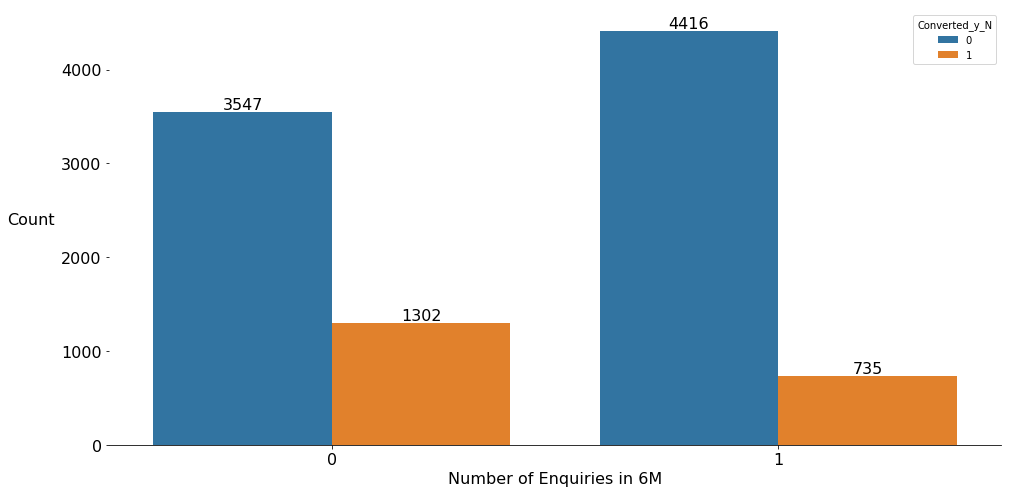

In [26]:
# 6M Enquiry Counts w.r.t Converted

"""Plot the target variable to make it easier to visualise. """
plt.figure(figsize=(16,8))
fig = sns.countplot(df.is_6M_enquiry,hue=df.Converted_y_N)
sns.despine(left=True)
fig.set_xlabel('Number of Enquiries in 6M', fontsize=16)
plt.xticks(fontsize=16)
fig.set_ylabel('Count', fontsize=16, rotation=0)
fig.yaxis.labelpad = 30
plt.yticks(fontsize=16)
#Annot
for p in fig.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    fig.annotate('{:}'.format((p.get_height())), (x.mean(), y-1), ha='center', va='bottom', fontsize=16, color='black')
plt.show()

In [27]:
df_enquiry = df.pivot_table(values='RowNumber',index='is_6M_enquiry',
                                           columns='Converted_y_N',aggfunc=len)
df_enquiry['Total']=df_enquiry[0]+df_enquiry[1]
df_enquiry['% Converted'] = (df_enquiry[1]/df_enquiry['Total'])*100
df_enquiry['% Not Converted'] = (df_enquiry[0]/df_enquiry['Total'])*100
df_enquiry

Converted_y_N,0,1,Total,% Converted,% Not Converted
is_6M_enquiry,,,,,
0,3547,1302,4849,26.850897,73.149103
1,4416,735,5151,14.269074,85.730926


<b>
    3M Active

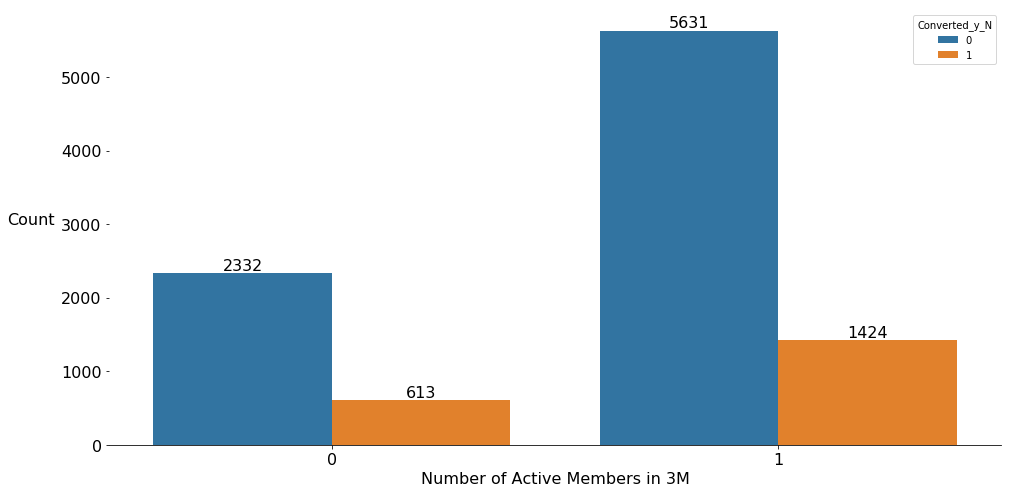

In [28]:
# 3M Active Counts w.r.t Converted

"""Plot the target variable to make it easier to visualise. """
plt.figure(figsize=(16,8))
fig = sns.countplot(df.is_3M_active,hue=df.Converted_y_N)
sns.despine(left=True)
fig.set_xlabel('Number of Active Members in 3M', fontsize=16)
plt.xticks(fontsize=16)
fig.set_ylabel('Count', fontsize=16, rotation=0)
fig.yaxis.labelpad = 30
plt.yticks(fontsize=16)
#Annot
for p in fig.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    fig.annotate('{:}'.format((p.get_height())), (x.mean(), y-1), ha='center', va='bottom', fontsize=16, color='black')
plt.show()

In [29]:
df_Active = df.pivot_table(values='RowNumber',index='is_3M_active',
                                           columns='Converted_y_N',aggfunc=len)
df_Active['Total']=df_Active[0]+df_Active[1]
df_Active['% Converted'] = (df_Active[1]/df_Active['Total'])*100
df_Active['% Not Converted'] = (df_Active[0]/df_Active['Total'])*100
df_Active

Converted_y_N,0,1,Total,% Converted,% Not Converted
is_3M_active,,,,,
0,2332,613,2945,20.814941,79.185059
1,5631,1424,7055,20.184266,79.815734


<b>
    FEATURE ENGINEERING

Feature Creation

Totally 2,037 leads were converted. Breakdown is as follows -

00 - Not active & No enquiry

01 - Not active but did enquiry

10 - Active but no enquiry

11 - Active and did enquiry


In [30]:
def flag_df(df):
    if (df['is_3M_active'] == '1' and df['is_6M_enquiry'] == '0'):
        return 'Active_NoEnquiry'
    elif (df['is_3M_active'] == '1' and df['is_6M_enquiry'] == '1'):
        return 'Active_Enquiry'
    elif (df['is_3M_active'] == '0' and df['is_6M_enquiry'] == '0'):
        return 'NotActive_NoEnquiry'
    elif (df['is_3M_active'] == '0' and df['is_6M_enquiry'] == '1'):
        return 'NotActive_Enquiry'

df['Status'] = df.apply(flag_df, axis = 1)

In [31]:
df.head()

,RowNumber,LeadId,Surname,months_since_lead_gen,lead_gen_channel,Gender,Age,City,airline_loyalty_tier,no_of_family_members,is_6M_enquiry,is_3M_active,Converted_y_N,Status
0,1,15634602,Hargrave,4,Networks,Female,42,Bangalore,None,1,1,1,1,Active_Enquiry
1,2,15647311,Hill,4,Organic,Female,41,Hyderabad,None,1,1,0,0,NotActive_Enquiry
2,3,15619304,Onio,3,Networks,Female,42,Mumbai,Platinum,3,0,1,1,Active_NoEnquiry
3,4,15701354,Boni,4,Networks,Female,39,Hyderabad,None,2,0,0,0,NotActive_NoEnquiry
4,5,15737888,Mitchell,6,Organic,Female,43,Bangalore,Base,1,1,1,0,Active_Enquiry


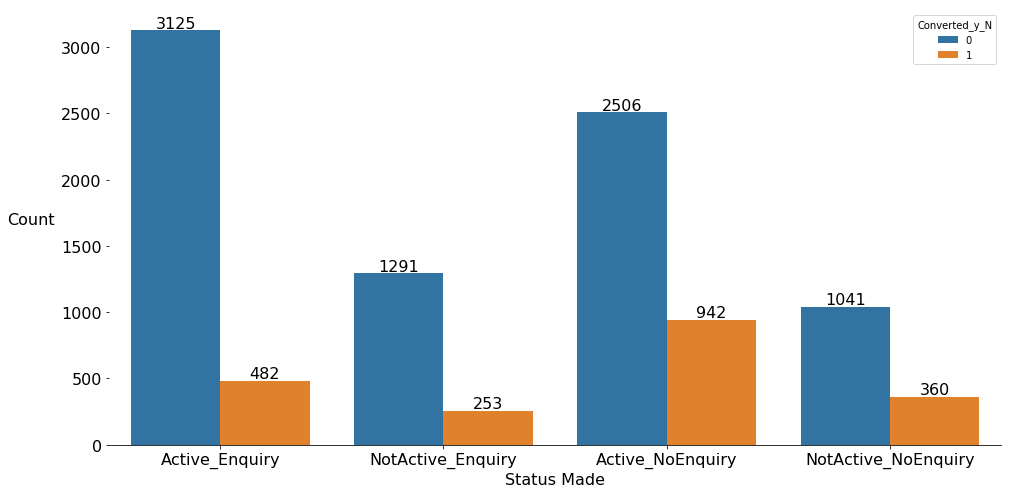

In [32]:
# Status w.r.t Converted

"""Plot the target variable to make it easier to visualise. """
plt.figure(figsize=(16,8))
fig = sns.countplot(df.Status,hue=df.Converted_y_N)
sns.despine(left=True)
fig.set_xlabel('Status Made', fontsize=16)
plt.xticks(fontsize=16)
fig.set_ylabel('Count', fontsize=16, rotation=0)
fig.yaxis.labelpad = 30
plt.yticks(fontsize=16)
#Annot
for p in fig.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    fig.annotate('{:}'.format((p.get_height())), (x.mean(), y-1), ha='center', va='bottom', fontsize=16, color='black')
plt.show()

In [33]:
df_Status = df.pivot_table(values='RowNumber',index='Status',
                                           columns='Converted_y_N',aggfunc=len)
df_Status['Total']=df_Status[0]+df_Status[1]
df_Status['% Converted'] = (df_Status[1]/df_Status['Total'])*100
df_Status['% Not Converted'] = (df_Status[0]/df_Status['Total'])*100
df_Status

Converted_y_N,0,1,Total,% Converted,% Not Converted
Status,,,,,
Active_Enquiry,3125,482,3607,13.362905,86.637095
Active_NoEnquiry,2506,942,3448,27.320186,72.679814
NotActive_Enquiry,1291,253,1544,16.386010,83.613990
NotActive_NoEnquiry,1041,360,1401,25.695931,74.304069


In [34]:
df.corr()

,RowNumber,Age,Converted_y_N
RowNumber,1.000000,0.000783,-0.016571
Age,0.000783,1.000000,0.285323
Converted_y_N,-0.016571,0.285323,1.000000


<b>
    Outlier Detection

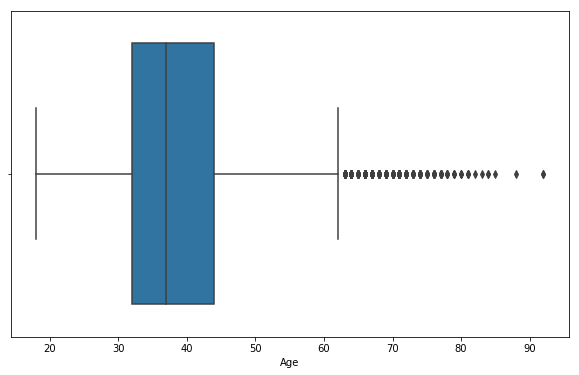

In [35]:
plt.figure(figsize=(10,6))
sns.boxplot(df.Age)
plt.show()

In [36]:
df.Age.describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

excess kurtosis of normal distribution (should be 0): 1.3940495456392599
skewness of normal distribution (should be 0): 1.0111685586628079


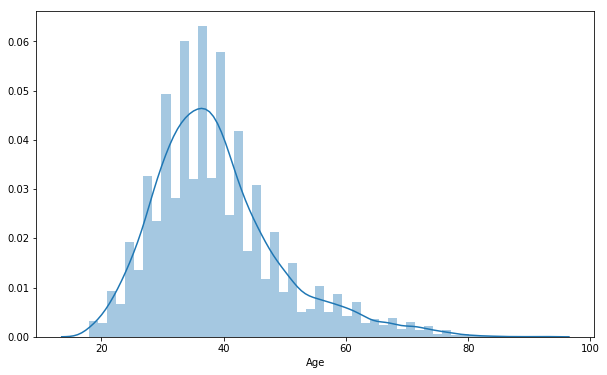

In [37]:
# Checking Distribution of the Continous Column
print( 'excess kurtosis of normal distribution (should be 0): {}'.format( kurtosis(df.Age) ))
print( 'skewness of normal distribution (should be 0): {}'.format( skew(df.Age) ))
plt.figure(figsize=(10,6))
sns.distplot(df.Age)
plt.show()

Applying Box Cox to make it a normal distribution

In [38]:
df['Age']= boxcox(df['Age'], boxcox_normmax(df['Age']))

excess kurtosis of normal distribution (should be 0): 0.13647883464618626
skewness of normal distribution (should be 0): -0.003588942581499243


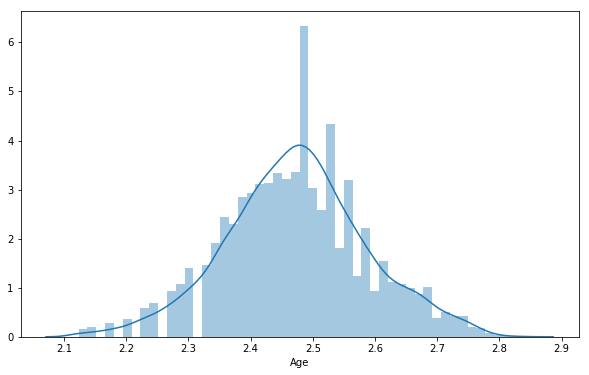

In [39]:
# Checking Distribution of the Continous Column
print( 'excess kurtosis of normal distribution (should be 0): {}'.format( kurtosis(df.Age) ))
print( 'skewness of normal distribution (should be 0): {}'.format( skew(df.Age) ))
plt.figure(figsize=(10,6))
sns.distplot(df.Age)
plt.show()

<b>
    Label Encoding the Categorical Columns

In [40]:
#Step 1 - Data Preprocessing. Conv text to numbers. 
#Label encoder is used to conv categories to num
categorical_variables = df.dtypes[df.dtypes == 'object'].index
categorical_variables

#Conv them using Label Encoder
le = LabelEncoder()
for var in categorical_variables:
    df[var] = le.fit_transform(df[var])

<b>
    Statistical Analysis

<b>
    Chi_Square Test

In [41]:
class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.dfObserved = None
        self.dfExpected = None
        
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="{0} is IMPORTANT for Prediction".format(colX)
        else:
            result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)

        print(result)
        
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(colX,alpha)

In [42]:
cT = ChiSquare(df)

#Feature Selection
for var in df.columns:
    cT.TestIndependence(colX=var,colY="Converted_y_N" ) 

RowNumber is NOT an important predictor. (Discard RowNumber from model)
LeadId is NOT an important predictor. (Discard LeadId from model)
Surname is NOT an important predictor. (Discard Surname from model)
months_since_lead_gen is IMPORTANT for Prediction
lead_gen_channel is IMPORTANT for Prediction
Gender is IMPORTANT for Prediction
Age is IMPORTANT for Prediction
City is NOT an important predictor. (Discard City from model)
airline_loyalty_tier is IMPORTANT for Prediction
no_of_family_members is IMPORTANT for Prediction
is_6M_enquiry is IMPORTANT for Prediction
is_3M_active is NOT an important predictor. (Discard is_3M_active from model)
Converted_y_N is IMPORTANT for Prediction
Status is IMPORTANT for Prediction


In [43]:
del df['RowNumber']
del df['LeadId']
del df['Surname']
del df['City']

<b>
    FEATURE SELECTION

In [44]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
rf = RandomForestClassifier(n_jobs=-1, class_weight=None, max_depth=7, random_state=0)
# Define Boruta feature selection method
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=0)

ModuleNotFoundError: No module named 'boruta'

In [ ]:
df1=df.copy()
X=df1.drop('Converted_y_N',axis=1)
y=df1.pop('Converted_y_N')
X=X.values

In [ ]:
feat_selector.fit(X,y)

In [ ]:
# Check selected features
print(feat_selector.support_)
# Select the chosen features from our dataframe.
selected = X[:, feat_selector.support_]
print ("")
print ("Selected Feature Matrix Shape")
print (selected.shape)

In [ ]:
# number of selected features
print('\n Number of selected features:')
print(feat_selector.n_features_)

In [ ]:
# check ranking of features
print('\n Feature ranking:')
print(feat_selector.ranking_)
print('\n Initial features: ', df.columns.tolist())

In [ ]:
data = df1
feature_df = pd.DataFrame(data.columns.tolist())
feature_df['rank'] = feat_selector.ranking_
feature_df = feature_df.sort_values('rank', ascending=True).reset_index(drop=True)
print('\n Top %d features:' % feat_selector.n_features_)
feature_df.columns = ['feature_name', 'Rank']
print(feature_df.head(feat_selector.n_features_))

<b>

<b>
    PCA

In [ ]:
def get_float_list(range_max:int, div:int=100) -> list:
    """ To get 0 -> 1, range_max must be same order of mag as div """
    return [float(x)/div for x in range(int(range_max))]
def get_colordict(filter_:str='dark') -> dict:
    """ return dictionary of colornames by filter """
    return dict((k, v) for k, v in cnames.items() if filter_ in k)

In [ ]:
def pca_report_interactive(X, scale_X:bool=True, save_plot:bool=False):
    """
    X:          input data matrix
    scale_X:    determine whether to rescale X (StandardScaler) [default: True, X is not prescaled
    save_plot:  save plot to file (html) and not show
    """

    # calculate mean and var
    X_mean, X_var = X.mean(), X.var()
    print('\n*--- PCA Report ---*\n')
    #print(f'X mean:\t\t{X_mean:.3f}\nX variance:\t{X_var:.3f}')

    if scale_X:
        # rescale and run PCA
        print("\n...Rescaling data...\n")
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        X_s_mean, X_s_var = X_scaled.mean(), X_scaled.var()
        print(f'X_scaled mean:\t\t{np.round(X_s_mean):.3f}')
        print(f'X_scaled variance:\t{np.round(X_s_var):.3f}\n')
        pca_ = PCA().fit(X_scaled)
        X_pca = PCA().fit_transform(X)
    else:
        # run PCA directly
        print("...Assuming data is properly scaled...")
        pca_ = PCA().fit(X)
        X_pca = PCA().fit_transform(X)
            
    # Get cumulative explained variance for each dimension
    pca_evr = pca_.explained_variance_ratio_
    cumsum_ = np.cumsum(pca_evr)
    
    # Get dimensions where var >= 95% and values for variance at 2D, 3D
    dim_95 = np.argmax(cumsum_ >= 0.95) + 1
    twoD = np.round(cumsum_[1], decimals=3)*100 
    threeD = np.round(cumsum_[2], decimals=3)*100
    instances_, dims_ =  X.shape
    
    # check shape of X
    if dims_ > instances_:
        print("WARNING: number of features greater than number of instances.")
        dimensions = list(range(1, instances_+1))
    else:
        dimensions = list(range(1, dims_+1))
    
    # Print report
    print("\n -- Summary --")
    print(f"You can reduce from {dims_} to {dim_95} dimensions while retaining 95% of variance.")
    print(f"2 principal components explain {twoD:.2f}% of variance.")
    print(f"3 principal components explain {threeD:.2f}% of variance.")
   
    
    """ - Plotting - """
    # Create custom HoverTool -- we'll name each ROC curve 'ROC' so we only see info on hover there
    hover_ = HoverTool(names=['PCA'], tooltips=[("dimensions", "@x_dim"), 
                                                ("cumulative variance", "@y_cumvar"),
                                                ("explained variance", "@y_var")])
    p_tools = [hover_, 'crosshair', 'zoom_in', 'zoom_out', 'save', 'reset', 'tap', 'box_zoom']

    # insert 0 at beginning for cleaner plotting
    cumsum_plot = np.insert(cumsum_, 0, 0) 
    pca_evr_plot = np.insert(pca_evr, 0, 0)
    dimensions_plot = np.insert(dimensions, 0, 0)

    """
    ColumnDataSource
    - a special type in Bokeh that allows you to store data for plotting
    - store data as dict (key:list)
    - to plot two keys against one another, make sure they're the same length!
    - below:
        x_dim    # of dimensions (length = # of dimensions)
        y_cumvar # cumulative variance (length = # of dimensions)
        var_95   # y = 0.95 (length = # of dimensions)
        zero_one # list of 0 to 1
        twoD     # x = 2 
        threeD   # x = 3 
    """ 
    
    # get sources
    source_PCA = ColumnDataSource(data=dict(x_dim = dimensions_plot,y_cumvar = cumsum_plot, y_var = pca_evr_plot))    
    source_var95 = ColumnDataSource(data=dict(var95_x = [dim_95]*96, var95_y = get_float_list(96)))
    source_twoD = ColumnDataSource(data=dict(twoD_x = [2]*(int(twoD)+1), twoD_y = get_float_list(twoD+1)))
    source_threeD = ColumnDataSource(data=dict(threeD_x = [3]*(int(threeD)+1), threeD_y = get_float_list(threeD+1)))

    """ PLOT """
    # set up figure and add axis labels
    p = figure(title='PCA Analysis', tools=p_tools)
    p.xaxis.axis_label = f'Total {dims_} Principal Components' 
    p.yaxis.axis_label = 'Variance Explained (per PC & Cumulative)'
    
    # add reference lines: y=0.95, x=2, x=3
    p.line('twoD_x', 'twoD_y', line_width=0.5, line_dash='dotted', color='#435363', source=source_twoD) # x=2
    p.line('threeD_x', 'threeD_y', line_width=0.5, line_dash='dotted', color='#435363', source=source_threeD) # x=3
    p.line('var95_x', 'var95_y', line_width=2, line_dash='dotted', color='#435363', source=source_var95) # var = 0.95

    # add bar plot for variance per dimension
    p.vbar(x='x_dim', top='y_var', width=.5, bottom=0, color='#D9F2EF', source=source_PCA, name='PCA')
    
    # add cumulative variance (scatter + line)
    p.line('x_dim', 'y_cumvar', line_width=1, color='#F79737', source=source_PCA)
    p.circle('x_dim', 'y_cumvar', size=7, color='#FF4C00', source=source_PCA, name='PCA')

    # change gridlines
    p.ygrid.grid_line_alpha = 0.25
    p.xgrid.grid_line_alpha = 0.25

    # change axis bounds and grid
    p.xaxis.bounds = (0, dims_)
    p.yaxis.bounds = (0, 1)
    p.grid.bounds = (0, dims_)

    # save and show p
    if save_plot:
        output_file('PCA_analysis.html')
    show(p)
        
    # output PCA info as a dataframe
    df_PCA = pd.DataFrame({'dimension': dimensions, 'variance_cumulative': cumsum_, 'variance': pca_evr}).set_index(['dimension'])
        
    return df_PCA, X_pca, pca_evr

In [ ]:
def pca_feature_correlation(X, X_pca, explained_var, features:list=None, fig_dpi:int=150, save_plot:bool=False):
    """
    1. Get dot product of X and X_pca
    2. Run normalizations of X*X_pca
    3. Retrieve df/matrices

    X:               data (numpy matrix)
    X_pca:           PCA
    explained_var:   explained variance matrix
    features:        list of feature names
    fig_dpi:         dpi to use for heatmaps
    save_plot:       save plot to file (html) and not show
    """
    
    # Add zeroes for data where features > instances
    outer_diff = X.T.shape[0] - X_pca.shape[1]
    if outer_diff > 0: # outer dims must match to get sq matrix
        Z = np.zeros([X_pca.shape[0], outer_diff])
        X_pca = np.c_[X_pca, Z]
        explained_var = np.append(explained_var, np.zeros(outer_diff))
    
    # Get correlation between original features (X) and PCs (X_pca)
    dot_matrix = np.dot(X.T, X_pca)
    print(f"X*X_pca: {X.T.shape} * {X_pca.shape} = {dot_matrix.shape}")
    
    # Correlation matrix -> df
    df_dotproduct = pd.DataFrame(dot_matrix)
    df_dotproduct.columns = [''.join(['PC', f'{i+1}']) for i in range(dot_matrix.shape[0])]
    if any(features): df_dotproduct.index = features    
    
    # Normalize & Sort
    df_n, df_na, df_nabv = normalize_dataframe(df_dotproduct, explained_var, plot_opt=True, save_plot=save_plot)
    
    return df_dotproduct, df_n, df_na, df_nabv


In [ ]:
def normalize_dataframe(df, explained_var=None, fig_dpi:int=150, plot_opt:bool=True, save_plot:bool=False):
    """
    1. Get z-normalized df (normalized to µ=0, σ=1)
    2. Get absolute value of z-normalized df
    3. If explained_variance matrix provided, dot it w/ (2)
    """
    # Normalize, Reindex, & Sort
    df_norm = (df.copy()-df.mean())/df.std()
    df_norm = df_norm.sort_values(list(df_norm.columns), ascending=False)
    
    # Absolute value of normalized (& sort)
    df_abs = df_norm.copy().abs().set_index(df_norm.index)
    df_abs = df_abs.sort_values(by=list(df_abs.columns), ascending=False)
    
    # Plot
    if plot_opt:
        # Z-normalized corr matrix
        plt.figure(dpi=fig_dpi)
        ax_normal = sns.heatmap(df_norm, cmap="RdBu")
        ax_normal.set_title("Z-Normalized Data")
        if save_plot:
            plt.savefig('Z_normalized_corr_matrix.png')
        else:
            plt.show()

        # |Z-normalized corr matrix|  
        plt.figure(dpi=fig_dpi)
        ax_abs = sns.heatmap(df_abs, cmap="Purples")
        ax_abs.set_title("|Z-Normalized|")
        if save_plot:
            plt.savefig('Z_normalized_corr_matrix_Abs.png')
        else:
            plt.show()
        
    # Re-normalize by explained var (& sort)
    if explained_var.any():
        df_byvar = df_abs.copy()*explained_var
        df_byvar = df_byvar.sort_values(by=list(df_norm.columns), ascending=False)
        if plot_opt:
            plt.figure(dpi=fig_dpi)
            ax_relative = sns.heatmap(df_byvar, cmap="Purples")
            ax_relative.set_title("|Z-Normalized|*Explained_Variance")
            if save_plot:
                plt.savefig('Normalized_corr_matrix.png')
            else:
                plt.show()
    else:
        df_byvar = None
    return df_norm, df_abs, df_byvar

In [ ]:
def pca_rank_features(df_nabv, verbose:bool=True):
    """
    Given a dataframe df_nabv with dimensions [f, p], where:
        f = features (sorted)
        p = principal components
        df_nabv.values are |Z-normalized X|*pca_.explained_variance_ratio_
        
    1. Create column of sum of each row, sort by it 'score_'
    3. Set index as 'rank'
    """
    df_rank = df_nabv.copy().assign(score_ = df_nabv.sum(axis=1)).sort_values('score_', ascending=False)
    df_rank['feature_'] = df_rank.index
    df_rank.index = range(1, len(df_rank)+1)
    df_rank.drop(df_nabv.columns, axis=1, inplace=True)
    df_rank.index.rename('rank', inplace=True)
    if verbose: print(df_rank)
    return df_rank


In [ ]:
def pca_full_report(X, features_:list=None, fig_dpi:int=150, save_plot:bool=False):
    """
    Run complete PCA workflow:
        1. pca_report_interactive()
        2. pca_feature_correlation()
        3. pca_rank_features()
        
    X:            data (numpy array)
    features_:    list of feature names
    fig_dpi:      image resolution
    
    """
    # Retrieve the interactive report
    df_pca, X_pca, pca_evr = pca_report_interactive(X, save_plot=save_plot)
    # Get feature-PC correlation matrices
    df_corr, df_n, df_na, df_nabv = pca_feature_correlation(X, X_pca, pca_evr, features_, fig_dpi, save_plot) 
    # Get rank for each feature
    df_rank = pca_rank_features(df_nabv)
    return (df_pca, X_pca, pca_evr, df_corr, df_n, df_na, df_nabv, df_rank)

In [ ]:
df.

In [ ]:
X1=df.drop('Converted_y_N',axis=1)
y1=df.Converted_y_N

In [ ]:
outputs = pca_full_report(X=X1, features_=X1.columns)

In [ ]:
# Splitting training & testing
validation_size = 0.20
seed = 9
X_train, X_test, Y_train, Y_test = train_test_split(X1,y1,test_size=validation_size, random_state = seed)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

In [ ]:
num_trees = 200
max_features = 3
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('GBM',GradientBoostingClassifier()))

#Fit Models and Evaulate

results = []
names = []
scoring = 'accuracy'

#Cross Validation
for name, model in models:
 kfold = KFold(n_splits = 10, random_state=7)
 cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring = scoring)
 results.append(cv_results)
 names.append(name)
 msg = "%s: %f (%f)" % (name,cv_results.mean(), cv_results.std())
 print(msg)

In [ ]:
#lets box plot model scores

fig = plt.figure()
fig.suptitle('ML algo comparison')
ax = fig.add_subplot(111)
plt.grid()
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

GBM gave the best accuracy since Tree based models are better equipped to handle imbalanced datasets

However, for our use case, accuracy is not the best metric to track.

Here the cost of False negative is higher then the cost of False positive.

In [ ]:
#create prediction model
model = GradientBoostingClassifier(n_estimators=num_trees, max_features=max_features)

#fit model
model.fit(X_train, Y_train)

#predict!
predictions = model.predict(X_test)

#check accuracy
print("Model --- GBM")
print("Accuracy: {} ".format(accuracy_score(Y_test,predictions) * 100))
print(classification_report(Y_test, predictions))

<b>
    CONFUSION MATRIX

In [ ]:
## Function property of Shaypal5 github user
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d",cmap='Blues')
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig

In [ ]:
cm=confusion_matrix(Y_test, predictions)

In [ ]:
print(print_confusion_matrix(cm,[0,1]))

<b>
    Final Model Bulilding

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
gbm = GradientBoostingClassifier()
params = {'learning_rate' : [0.1, 0.01, 0.001], 'n_estimators' : np.arange(100,500),
           'subsample' : [0.8, 0.9, 1.0], 'min_samples_split' : [0.01, 0.001],
           'max_depth' : np.arange(1,50), 'max_features' : ['auto', 'sqrt', 'log2'],
          }
rsearch = RandomizedSearchCV(gbm, params, cv=5, n_iter=10, n_jobs=5, scoring='accuracy', verbose=True)
rsearch.fit(X1,y1)

In [ ]:
pred=rsearch.predict(X_test)
print("Model --- Gradient Boost")
print("Accuracy: {} ".format(accuracy_score(Y_test,pred) * 100))
print(classification_report(Y_test, pred))
cm=confusion_matrix(Y_test, pred)
print(print_confusion_matrix(cm,[0,1]))

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
RF = RandomForestClassifier()
params = {'criterion' : ['gini', 'entropy'], 'n_estimators' : np.arange(1,300),
            'min_samples_split' : [0.01, 0.001],
           'max_depth' : np.arange(1,50), 'max_features' : ['auto', 'sqrt', 'log2'],
          }
rsearch1 = RandomizedSearchCV(RF, params, cv=5, n_iter=10, n_jobs=5, scoring='accuracy', verbose=True)
rsearch1.fit(X1,y1)

In [ ]:
pred1=rsearch1.predict(X_test)
print("Model --- Random Forest")
print("Accuracy: {} ".format(accuracy_score(Y_test,pred1) * 100))
print(classification_report(Y_test, pred1))
cm1=confusion_matrix(Y_test, pred1)
print(print_confusion_matrix(cm1,[0,1]))